# Modelling the director curve

In [14]:
%pylab inline
#% config InlineBackend.figure_format = 'svg'

import pandas as pd
import seaborn as sns
sns.set()

import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression#, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf 

Populating the interactive namespace from numpy and matplotlib


/Users/kibbles/anaconda3/envs/metis/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['exponential']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
path=('./data/mojo_all_years_movies_cleaned.pkl')
df = pd.read_pickle(path)
df

,Movie_Title,Domestic_Distributor,Domestic_Total_Gross,Runtime,Rating,Release_Date,Budget,Cast1,Cast2,Cast3,...,Writer,Producer,Cinematographer,Profit_percent,G,NC-17,Not Rated,PG,PG-13,R
0,Inside the Rain,Sky Island Films,8140,90.0,NaN,2020-03-13,NaN,Rosie Perez,Eric Roberts,Aaron Fisher,...,Aaron Fisher,George LaVoo,Josh Fisher,NaN,0,0,0,0,0,0
1,The Hunt,Universal Pictures,5812500,90.0,R,2020-03-13,14000000.0,Betty Gilpin,Hilary Swank,Ike Barinholtz,...,Nick Cuse,Jason Blum,Darran Tiernan,-0.584821,0,0,0,0,0,1
2,Never Rarely Sometimes Always,Focus Features,16565,101.0,PG-13,2020-03-13,NaN,Eliazar Jimenez,David Buneta,Christian Clements,...,Eliza Hittman,Lia Buman,Hélène Louvart,NaN,0,0,0,0,1,0
3,Moondance,,2371,97.0,NaN,2020-03-13,NaN,Adam Conover,Cooper Flannigan,Sam Jones,...,Cooper Flannigan,Chase Crawford,Greg Kraus,NaN,0,0,0,0,0,0
4,The Roads Not Taken,Bleecker Street Media,3518,85.0,R,2020-03-13,NaN,Javier Bardem,Elle Fanning,Salma Hayek,...,Sally Potter,Christopher Sheppard,Robbie Ryan,NaN,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15968,Modern Times,United Artists,163577,87.0,NaN,1936-02-05,NaN,Charles Chaplin,Paulette Goddard,Henry Bergman,...,Charles Chaplin,NaN,Ira H. Morgan,NaN,0,0,0,0,0,0
15969,M,Foremco Pictures Corporation,35566,117.0,NaN,1933-03-31,NaN,Peter Lorre,Ellen Widmann,Inge Landgut,...,Thea von Harbou,NaN,Fritz Arno Wagner,NaN,0,0,0,0,0,0
15970,City Lights,United Artists,19181,87.0,G,1931-01-30,NaN,Charles Chaplin,Virginia Cherrill,Florence Lee,...,Charles Chaplin,NaN,Gordon Pollock,NaN,1,0,0,0,0,0
15971,Metropolis,Paramount Pictures,1236166,153.0,NaN,1927-05-06,NaN,Brigitte Helm,Alfred Abel,Gustav Fröhlich,...,Thea von Harbou,Erich Pommer,Karl Freund,NaN,0,0,0,0,0,0


## Plot original

Text(0.5, 1.0, 'Highest Avg Gross: Directors 1980-2020')

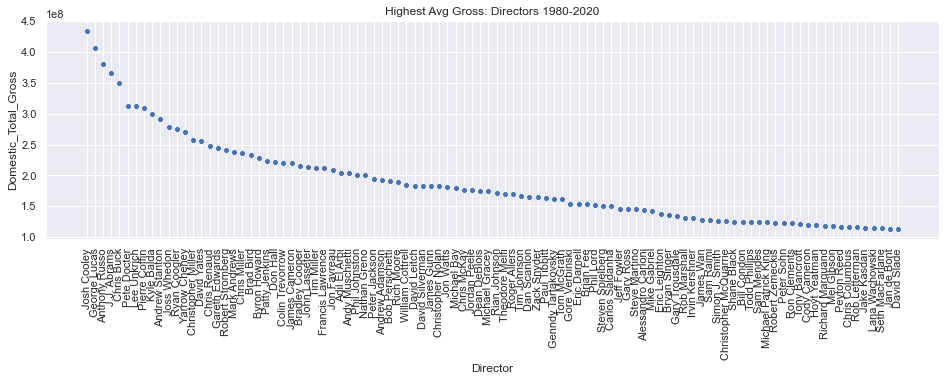

In [7]:
d_gross_mean=(df.groupby(['Director'])['Domestic_Total_Gross']
               .mean()
               .reset_index()
               .sort_values(by=['Domestic_Total_Gross'], ascending=False)
            )
#d_gross_mean['Domestic_Total_Gross'] = d_gross_mean['Domestic_Total_Gross'].apply(lambda x: np.log(x))
#d_gross_mean
plt.subplots(figsize=(16,4))
plat = sns.scatterplot(data=d_gross_mean[:100],x=d_gross_mean[:100]['Director'],y=d_gross_mean[:100]['Domestic_Total_Gross']);
#plut = sns.scatterplot(data=d_gross_mean[:100],x=d_gross_mean[:100]['Director'],y=d_gross_mean[:100]['Domestic_Total_Gross'].apply(lambda x: np.log(x)));
plt.xticks(rotation=90); plt.title('Highest Avg Gross: Directors 1980-2020')

## Try to fit exp decay with scipy curve_fit

### Data to fit 

In [32]:
d_gross_mean.reset_index().drop(columns=['index','Director'])
x_array = d_gross_mean.reset_index().drop(columns=['index','Director']).index # x array
y_array = d_gross_mean.reset_index().drop(columns=['index','Director'])['Domestic_Total_Gross']


### Function to fit (exp decay)

In [21]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [51]:
params, covariance = scipy.optimize.curve_fit(exponential, x_array, y_array, p0=[100,-0.0005, 1000000])


In [49]:
print(params)
print(covariance)

[ 1.10339645e+01 -4.27161361e-02  1.00000002e+06]
[[ 1.23050770e+14 -5.32254116e+11 -2.14872507e+10]
 [-5.32254116e+11  5.55740603e+09 -1.67924955e+09]
 [-2.14872507e+10 -1.67924955e+09  1.03325907e+11]]


### plot resulting function alongside data

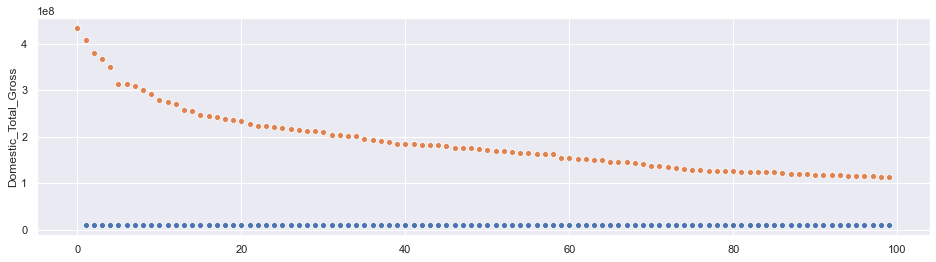

In [57]:
plt.subplots(figsize=(16,4))
sns.scatterplot(x=x_array[:100], y=exponential(x_array[:100],params[0],params[1],params[2]) );
plat = sns.scatterplot(data=d_gross_mean[:100],x=d_gross_mean.reset_index().index[:100],y=d_gross_mean[:100]['Domestic_Total_Gross']);


## Use sklearn model